# Prerequisites

In this task, we will be comparing the random forest to single trees for breast cancer diagnostics. This is the same prediction task that we tackled in the "Module-4-Decision-Tree-Assignment.ipynb" notebook. Therefore, you should reuse your solution from that assignment. If you no longer have that assignment or want a fresh start, we will distribute the "Module-4-Decision-Tree-Assignment-With-Answers.ipynb" notebook for you to use. Our intent is that you can add some code to that notebook to satisfy this assignment

In [ ]:
!pip install pydot_ng
!apt-get install graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
# basic libraries you need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# these libraries are need for the tree visualization (which is provided)
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from graphviz import Source
import pydot_ng as pydot

# These are the functions from sklearn we recommend using for this assignment
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score

# The following is code for uploading a file to the colab.research.google 
# environment.

# library for uploading files
from google.colab import files 

def upload_files():
    # initiates the upload - follow the dialogues that appear
    uploaded = files.upload()

    # verify the upload
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))

    # uploaded files need to be written to file to interact with them
    # as part of a file system
    for filename in uploaded.keys():
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
upload_files()

Saving breast-cancer-data.csv to breast-cancer-data.csv
User uploaded file "breast-cancer-data.csv" with length 125204 bytes


In [ ]:
cancer_df = pd.read_csv("breast-cancer-data.csv")
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
cancer_df = cancer_df.drop("Unnamed: 32",axis=1)

In [ ]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
np.random.seed(1337)

label_column_name = "diagnosis"
labels = cancer_df.loc[:, label_column_name]
labels = labels.apply(lambda x: 1 if x=="M" else 0)


feat_column_names = list(cancer_df.columns[2:-1])
features = cancer_df.loc[:, feat_column_names]

In [ ]:
np.random.seed(1337)
skf = StratifiedKFold(n_splits=5, shuffle=True)
total_preds = []
total_labels = []
loop_number = 0
for train_indices, test_indices in skf.split(features, labels):
    train_features = features.iloc[train_indices, :]
    train_labels = labels.iloc[train_indices]

    test_features = features.iloc[test_indices, :]
    test_labels = labels.iloc[test_indices]

    tree = DecisionTreeClassifier(max_depth=3,class_weight="balanced")
    tree = tree.fit(train_features, train_labels)
    preds = tree.predict(test_features)
    
    total_preds.extend(preds)
    total_labels.extend(test_labels)
    loop_number += 1

print(accuracy_score(total_labels, total_preds))
print(precision_score(total_labels, total_preds))
print(recall_score(total_labels, total_preds))

0.9261862917398945
0.9009433962264151
0.9009433962264151


In [ ]:
def display_tree(tree):
    """
    args:
        tree -  a DecisionTreeClassifier object that has been trained.
    """
    dot_data = StringIO()
    Source(export_graphviz(tree,
                           out_file=dot_data,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           class_names=["Benign", "Malignant"],
                           feature_names=features.columns))
    graph = pydot.graph_from_dot_data(dot_data.getvalue())

    graph.write_png("tmp_image.png")
    tmp_image = plt.imread("tmp_image.png")

    plt.figure(figsize=(20, 10))
    plt.imshow(tmp_image)
    plt.grid(False)

# Tools

The new classifier you will need is the RandomForestClassifier:

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

It has the "fit" and "predict" methods like any other sklearn classifier. 

You will want to take careful notice of the "estimators_" attribute. This is a list of DecisionTreeClassifiers. You will need to iterate this list to evaluate the individual trees separately. You can also adjust the number of estimators with the "n_estimators" parameter in the RandomForestClassifier constructor. 



# Tasks

### 1) Add Necessary Imports

At the very least you will have to add "RandomForestClassifier" and "test_train_split" to the 

### 2) Add a RandomForestClassifier to the Cross Validation

Compare the results of RandomForestClassifier to the DecisionTreeClassifier already there. You probably want to keep "max_depth" the same for both classifiers, but how you explore this exactly is up to you. I recommend setting "class_weight="balanced"" for both classifiers. Try playing with the "n_estimators" argument.

### 3) Visualize and Evaluate the Individual Trees in the Forest

Add a new code block at the end of the notebook. Use "train_test_split" to divide the features and labels into train and test sets. Train a RandomForestClassifier on the train data and evaluate it on the test data. Then for each tree that bleongs to the forest, evaluate it on the test data and visualize the tree. Remember that you can use display_tree in this notebook.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

total_preds = []
total_labels = []

for train_indices, test_indices in skf.split(features, labels):
    train_features = features.iloc[train_indices, :]
    train_labels = labels.iloc[train_indices]

    test_features = features.iloc[test_indices, :]
    test_labels = labels.iloc[test_indices]

    tree = RandomForestClassifier(max_depth=3, class_weight="balanced")

    tree = tree.fit(train_features, train_labels)
    preds = tree.predict(test_features)
    
    total_preds.extend(preds)
    total_labels.extend(test_labels)
    

print(accuracy_score(total_labels, total_preds))
print(precision_score(total_labels, total_preds))
print(recall_score(total_labels, total_preds))

0.945518453427065
0.9209302325581395
0.9339622641509434


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.2)
tree = RandomForestClassifier(max_depth=3, class_weight="balanced",n_estimators=10)

tree = tree.fit(x_train, y_train)
preds = tree.predict(x_test)
print(accuracy_score(y_test, preds))

0.9385964912280702


0.9035087719298246
0.9385964912280702
0.8771929824561403
0.8771929824561403
0.8859649122807017
0.9385964912280702
0.8947368421052632
0.9298245614035088
0.8771929824561403
0.8947368421052632


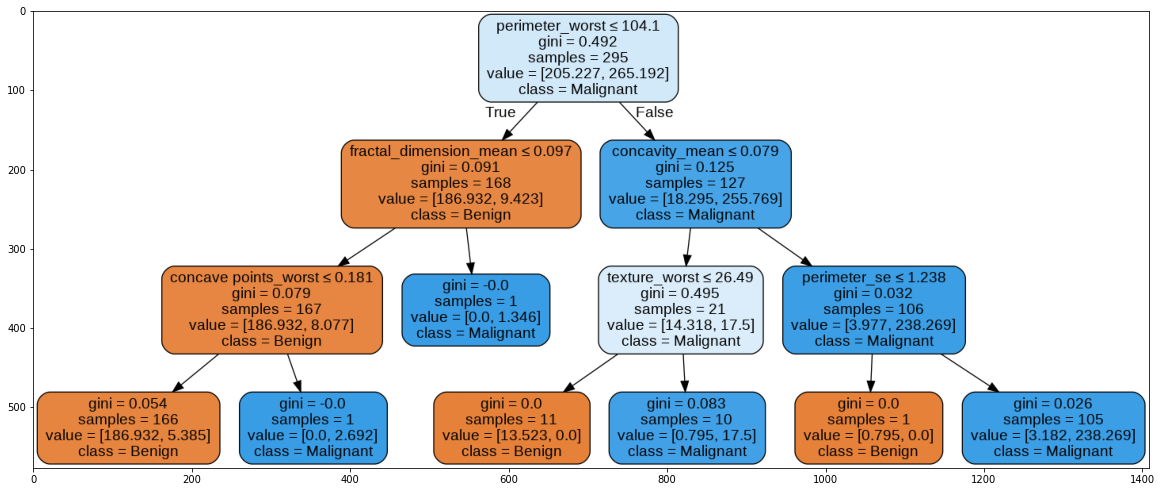

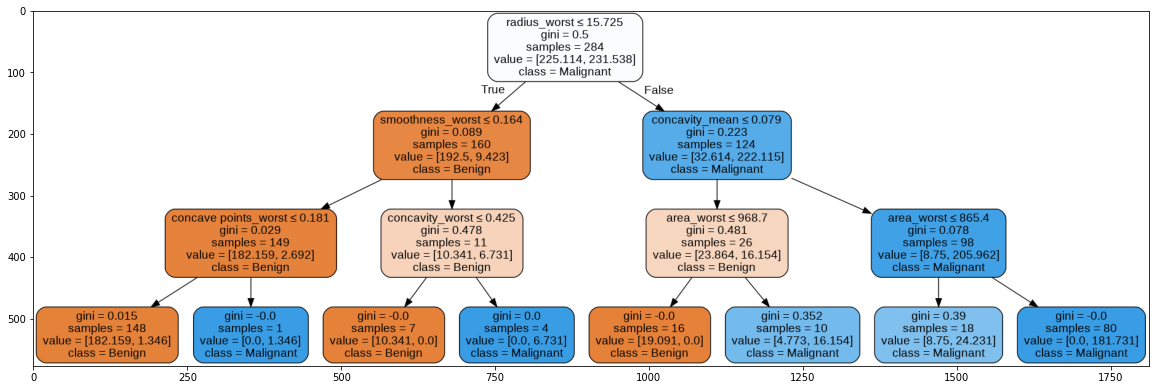

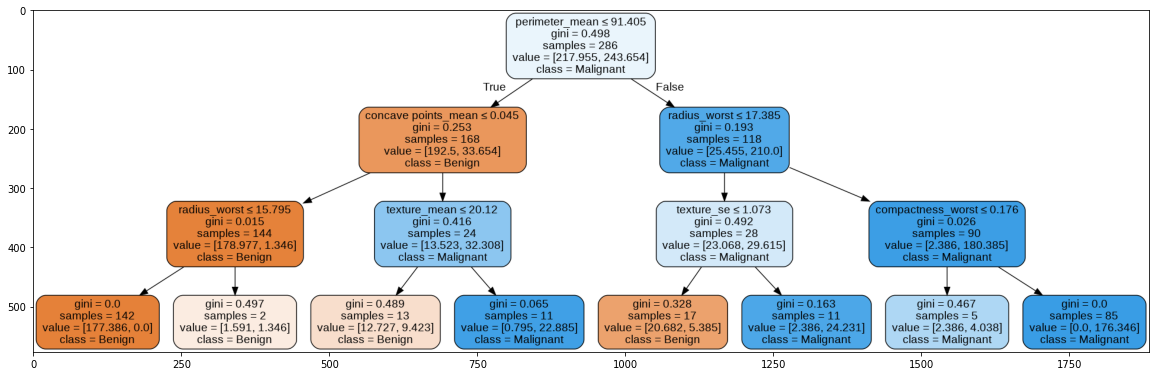

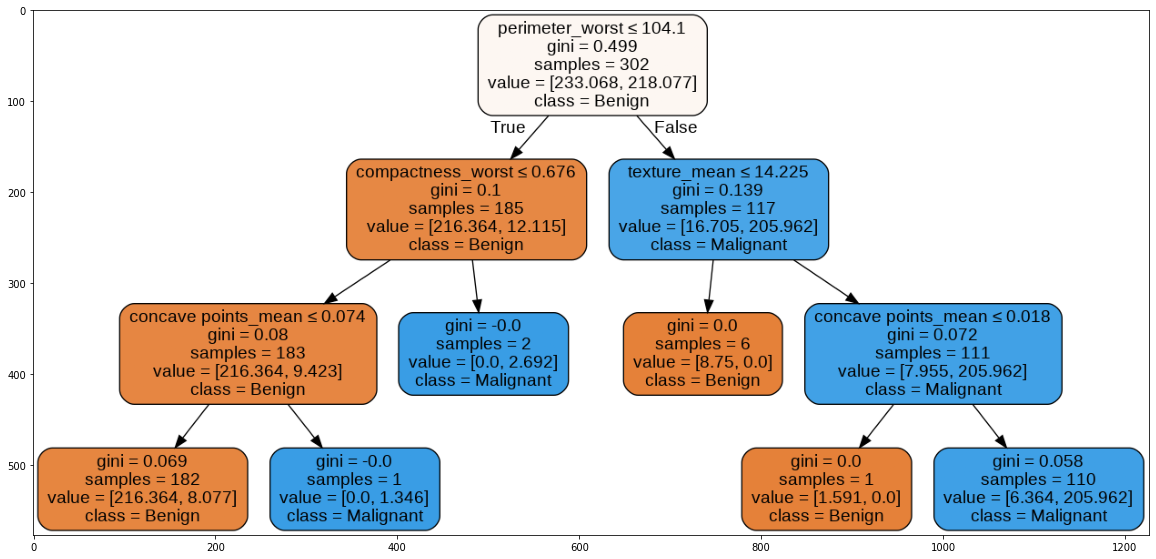

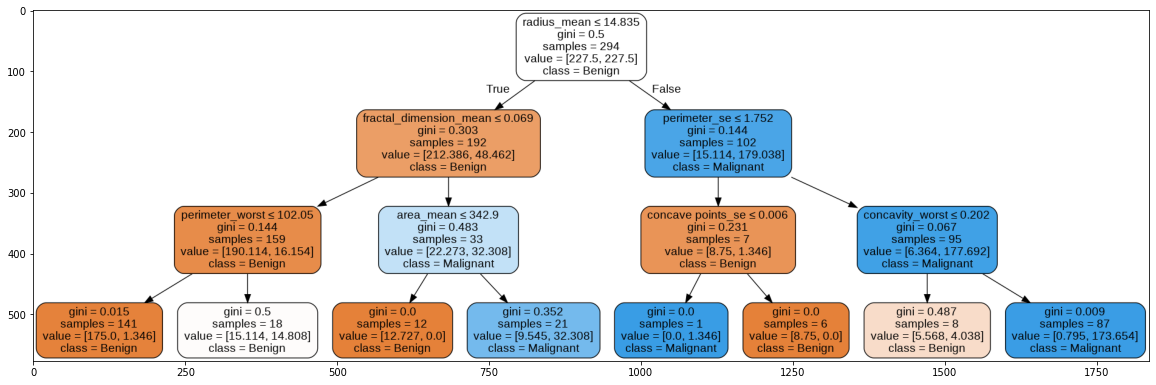

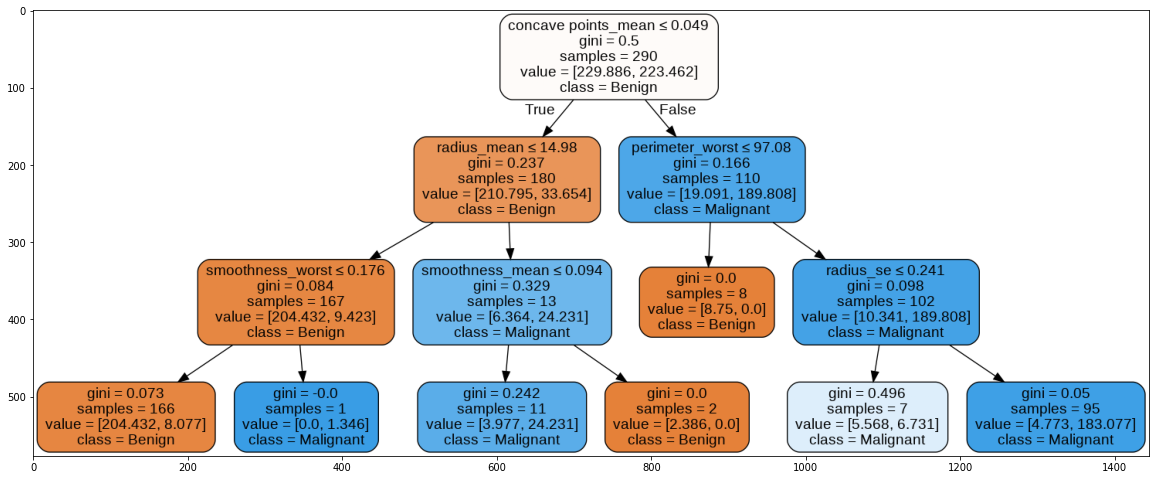

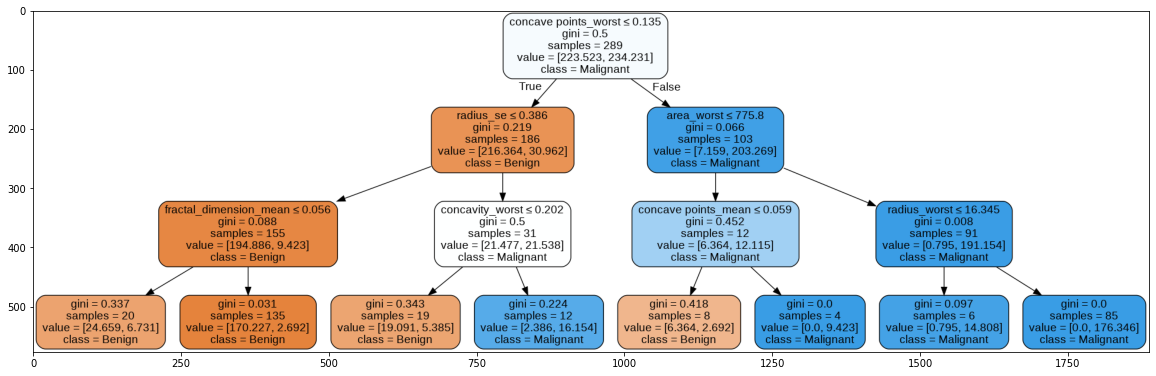

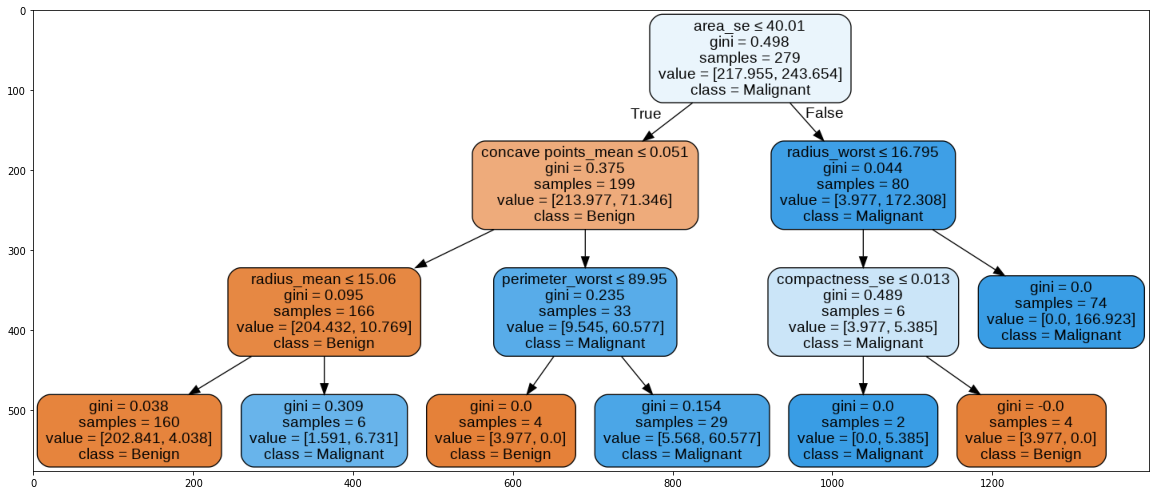

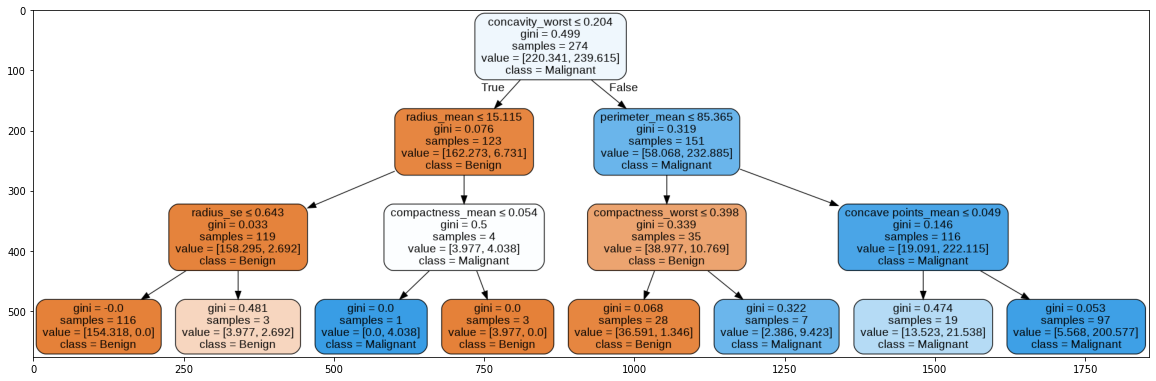

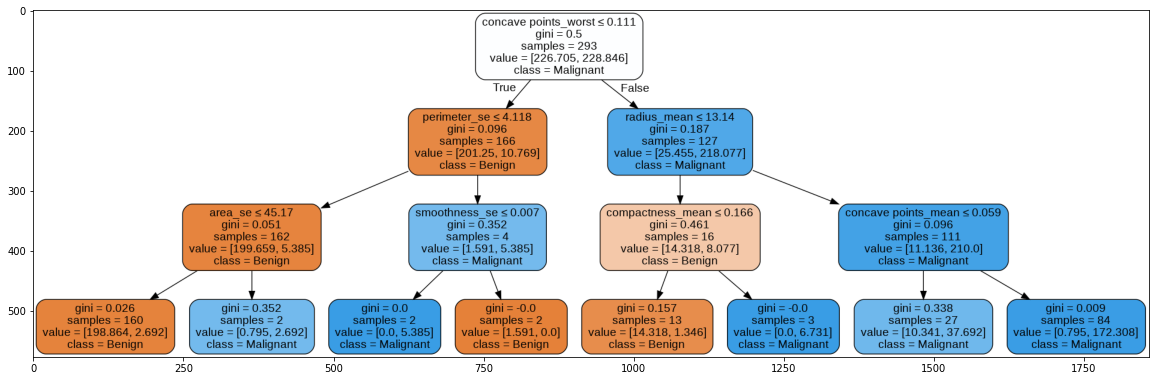

In [ ]:
for t in tree.estimators_:
  preds = t.predict(x_test)
  print(accuracy_score(y_test, preds))
  display_tree(t)

# Extras and Discussion Points

1) What features are common across the trees in the forest? What features did the individual tree value that the forest did not and vice versa?

2) Try tuning the random forest hyper parameters. Start with a grid search and try a random search as well. There are sklearn functions you can use for that:

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

